In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.chdir('/Users/chloe/Desktop/UVa/Courses/SYS6018/Exercises/Kaggle/Google/data')

In [5]:
raw_train = pd.read_csv('train.csv',low_memory=False)

In [6]:
raw_test = pd.read_csv('test.csv',low_memory=False)

In [8]:
raw_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [7]:
train_df = raw_train
test_df = raw_test

In [8]:
# Some column names are too long and share same prefix, so we change them to short names.
for col in train_df.columns:
    newcol = col
    if col == 'channelGrouping':
        newcol = 'channel'
    elif col == 'fullVisitorId':
        newcol = 'Id'
    elif col == 'totals.transactionRevenue':
        print (col)
        newcol = 'revenue'
    elif col.startswith('socialEngagementType'):
        newcol = col.replace('socialEngagementType','social')
    elif col.startswith('device'):
        newcol = col.replace('device','d')
    elif col.startswith('geoNetwork'):
        newcol = col.replace('geoNetwork','g')
    elif col.startswith('trafficSource'):
        newcol = col.replace('trafficSource','t')
    train_df.rename(columns = {col:newcol}, inplace = True)
    test_df.rename(columns = {col:newcol}, inplace = True)

colnames = train_df.columns

totals.transactionRevenue


In [9]:
# Check renamed columns names.
colnames

Index(['channel', 'date', 'Id', 'sessionId', 'social', 'visitId',
       'visitNumber', 'visitStartTime', 'd.browser', 'd.browserSize',
       'd.browserVersion', 'd.dCategory', 'd.flashVersion', 'd.isMobile',
       'd.language', 'd.mobileDeviceBranding', 'd.mobileDeviceInfo',
       'd.mobileDeviceMarketingName', 'd.mobileDeviceModel',
       'd.mobileInputSelector', 'd.operatingSystem',
       'd.operatingSystemVersion', 'd.screenColors', 'd.screenResolution',
       'g.city', 'g.cityId', 'g.continent', 'g.country', 'g.latitude',
       'g.longitude', 'g.metro', 'g.networkDomain', 'g.networkLocation',
       'g.region', 'g.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'revenue', 'totals.visits',
       't.adContent', 't.adwordsClickInfo.adNetworkType',
       't.adwordsClickInfo.criteriaParameters', 't.adwordsClickInfo.gclId',
       't.adwordsClickInfo.isVideoAd', 't.adwordsClickInfo.page',
       't.adwordsClickInfo.slot', 't.campai

In [10]:
# Check missing value
def get_na_rate(dataframe):
    na_count = dataframe.isnull().sum()
    na_rate = na_count / len(dataframe)
    na_df = pd.concat([na_count, na_rate], axis=1, keys=['count', 'percent'])
    na_df = na_df[na_df['percent']>0]
    na_df = na_df.sort_values(['percent'], ascending=False)
    return na_df

na_df = get_na_rate(train_df)
na_df

,count,percent
t.campaignCode,903652,0.999999
t.adContent,892707,0.987887
revenue,892138,0.987257
t.adwordsClickInfo.adNetworkType,882193,0.976252
t.adwordsClickInfo.isVideoAd,882193,0.976252
t.adwordsClickInfo.page,882193,0.976252
t.adwordsClickInfo.slot,882193,0.976252
t.adwordsClickInfo.gclId,882092,0.976140
t.isTrueDirect,629648,0.696781
t.referralPath,572712,0.633774


In [11]:
# Many columns have constant value
train_df.iloc[:,8:].describe()

,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,revenue,totals.visits,t.adwordsClickInfo.page
count,450630.0,903653.000000,703060.0,903553.000000,1.151500e+04,903653.0,21460.000000
mean,1.0,4.596538,1.0,3.849764,1.337448e+08,1.0,1.008108
std,0.0,9.641437,0.0,7.025274,4.482852e+08,0.0,0.173584
min,1.0,1.000000,1.0,1.000000,1.000000e+04,1.0,1.000000
25%,1.0,1.000000,1.0,1.000000,2.493000e+07,1.0,1.000000
50%,1.0,2.000000,1.0,1.000000,4.945000e+07,1.0,1.000000
75%,1.0,4.000000,1.0,4.000000,1.076550e+08,1.0,1.000000
max,1.0,500.000000,1.0,469.000000,2.312950e+10,1.0,14.000000


In [13]:
train_id = list(set(train_df['Id'])) # 714167 unique ID in training set
test_id = list(set(test_df['Id']))   # 617242 unique ID in training set
inter_id = ([id for id in test_id if id in train_id]) # Only 7679 test IDs are in train's ID list

In [21]:
inter_id = list(train_id.intersection(test_id))
len(inter_id)

7679

In [39]:
cols_unique = train_df.columns[train_df.nunique(dropna=False)==1]
cols_unique

Index(['social', 'd.browserSize', 'd.browserVersion', 'd.flashVersion',
       'd.language', 'd.mobileDeviceBranding', 'd.mobileDeviceInfo',
       'd.mobileDeviceMarketingName', 'd.mobileDeviceModel',
       'd.mobileInputSelector', 'd.operatingSystemVersion', 'd.screenColors',
       'd.screenResolution', 'g.cityId', 'g.latitude', 'g.longitude',
       'g.networkLocation', 'totals.visits',
       't.adwordsClickInfo.criteriaParameters'],
      dtype='object')

### Revenue

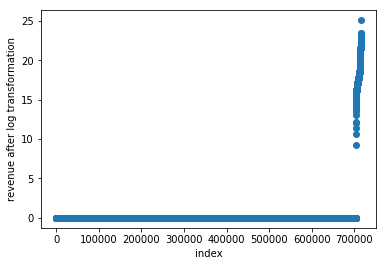

In [18]:
# Have a look at the revenue which is what we are going to predict
# From the graph, we can see there is a clear pattern which is consistent
# with the 80/20 rule.
train_df['revenue'] = train_df['revenue'].fillna('0').astype('float')
revenue = train_df.groupby('Id')['revenue'].sum().reset_index()
revenue['revenue'] = np.log1p(revenue['revenue'].values) # takes natural log of revenue as is required in the competition
plt.figure()
plt.scatter(range(revenue.shape[0]),np.sort(revenue['revenue']))
plt.xlabel('index')
plt.ylabel('revenue after log transformation')
plt.show()

In [80]:
revenue['revenue'].astype('bool').sum(axis=0)/len(revenue) # 0.013973415418283704 Only 1.4% of visitor makes transaction.
id_zero = revenue[revenue['revenue'] == 0]['Id']    # 704171 visitors who didn't make any transaction
id_nonzero = revenue[revenue['revenue'] != 0]['Id'] # 9996 visitors who actually did make transactions

In [85]:
zero_df = train_df[train_df['Id'].isin(id_zero)]
nonzero_df = train_df[train_df['Id'].isin(id_nonzero)]

### channelGrouping 

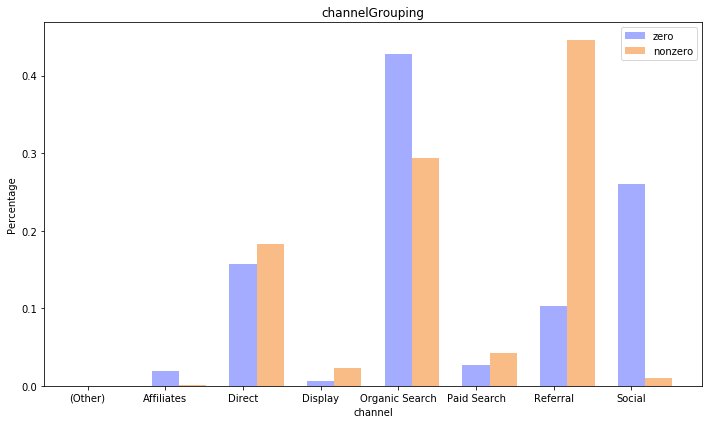

In [178]:
# Top 3 channels for visitors with no revenue: Organic search, Social and Direct.
# Top 3 channels for visitors with revenue: Referral, Organic search and Direct.
# Referal plays an important role in differentiating the visitors.

def plot_two_groups(column):
    channel_zero = zero_df.groupby(column)[column].count()/len(zero_df)
    channel_nonzero = nonzero_df.groupby(column)[column].count()/len(nonzero_df)
    ind = np.arange(len(channel_zero))
    width = 0.35
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(ind, channel_zero, width=0.35,  color='#a3acff', label='zero')
    ax.bar(ind+width, channel_nonzero, width=0.35, color='#f9bc86', label='nonzero')
    title = raw_train.columns[names.index(column)]
    plt.xticks(ind, channel_zero.index)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_two_groups('channel')

### Device

In [47]:
device_cols = [col for col in train_df.columns if col.startswith('d.')and col not in cols_unique]
device_cols

['d.browser', 'd.dCategory', 'd.isMobile', 'd.operatingSystem']

#### Device.Browser

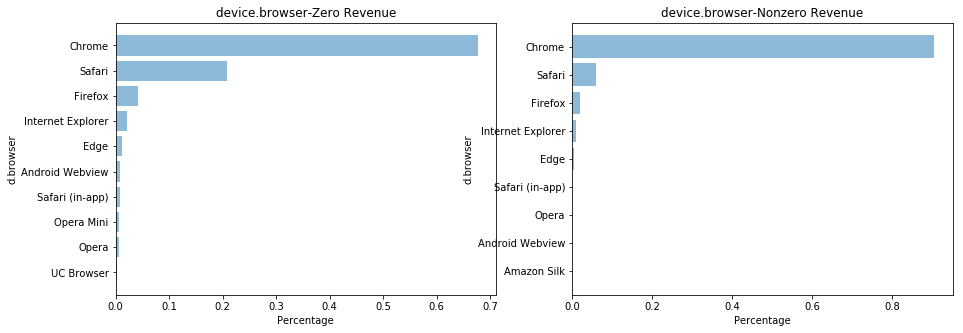

In [247]:
# Visitors with zero revenue and non-zero revenue share the same top 3 frequently used browsers.
# While visitors with zero revenue tends to have a higher tendency of using the these browsers.
def plot_diff_groups(column, k_zero=0, k_nonzero=0):     # k_zero, k_nonzero: top k classes to be displayed.
    browser_zero = zero_df.groupby(column)[column].count().sort_values()/len(zero_df)
    browser_nonzero = nonzero_df.groupby(column)[column].count().sort_values()/len(nonzero_df)
    title = raw_train.columns[names.index(column)]
    plt.subplots(ncols=2, figsize=(15,5))
    plt.subplot(121)
    plt.barh(browser_zero.index[-k_zero:], browser_zero[-k_zero:], align='center', alpha=0.5)
    plt.xlabel('Percentage')
    plt.ylabel(column)
    plt.title(title+"-Zero Revenue")
    plt.subplot(122)
    plt.barh(browser_nonzero.index[-k_nonzero:], browser_nonzero[-k_nonzero:], align='center', alpha=0.5)
    plt.xlabel('Percentage')
    plt.ylabel(column)
    plt.title(title+"-Nonzero Revenue")
    plt.show()
plot_diff_groups('d.browser',10)

#### Device.dCategory

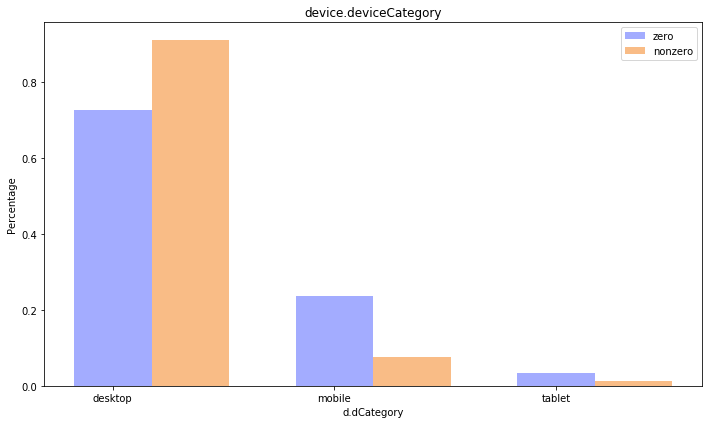

In [181]:
# Both visitors groups use desktop to access the Store most frequently.
# Visitors with revenue have a higher tendency of using desktop.

plot_two_groups('d.dCategory')

#### Device.isMobile

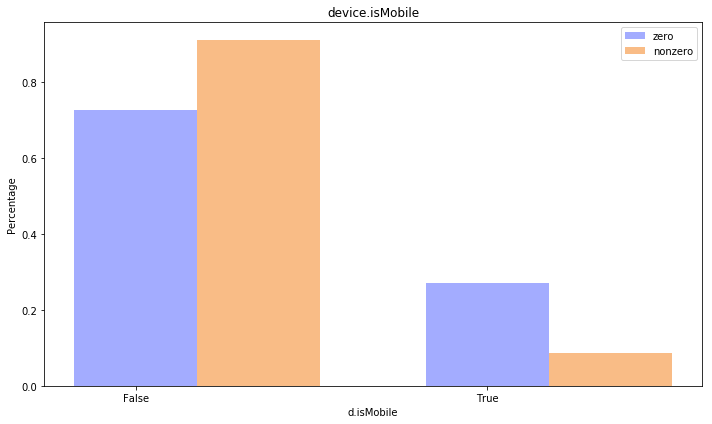

In [183]:
# Visitors who actually made transactions prefered not to use the mobile phone to access the Store.

plot_two_groups('d.isMobile')

#### Device.operatingSystem

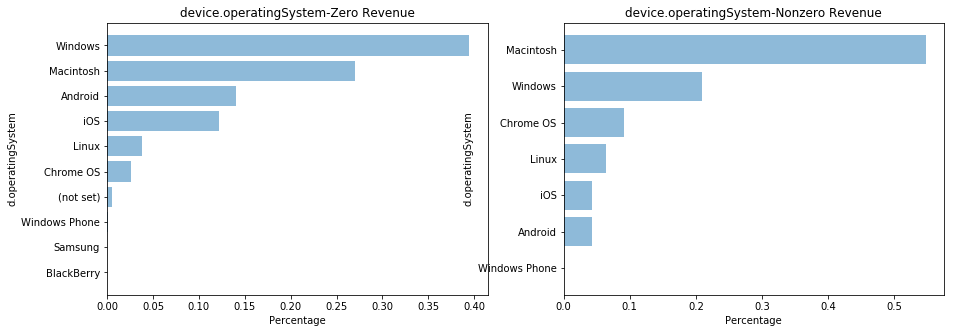

In [264]:
# Top 3 operating systems for visitors with no revenue: Windows, Mac and Android.
# Top 3 channels for visitors with revenue: Mac, Windows and Chrome OS.
# More than half of the visitors with revenue used mac to access Store.

plot_diff_groups('d.operatingSystem',10)

### GeoNetwork

In [236]:
geo_cols = [col for col in train_df.columns if col.startswith('g.')and col not in cols_unique]
geo_cols

['g.city',
 'g.continent',
 'g.country',
 'g.metro',
 'g.networkDomain',
 'g.region',
 'g.subContinent']

In [ ]:
# All the plots can be shown together with the commands below.
# In order to look at each column in detail, I will plot them one by one.
for item in geo_cols:
    plot_diff_groups(item,10,10)

#### GeoNetwork.city

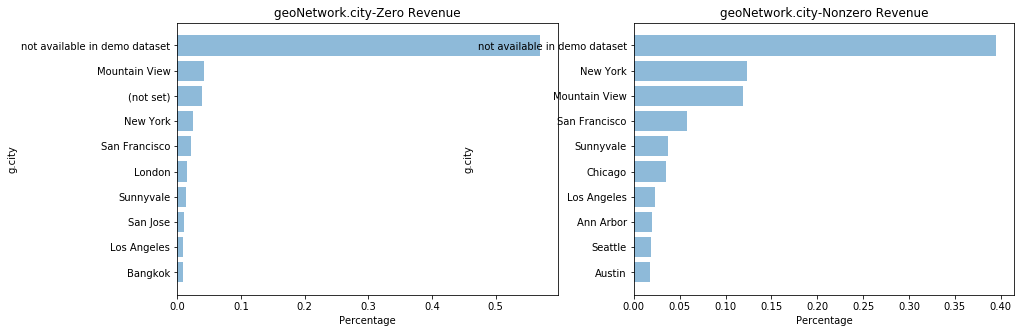

In [248]:
# Not much to tell from the two graphs because the majority of records are not available.
# New York and Mountain View are two major cities where the visitors making transactions come from among all the cities.

plot_diff_groups('g.city',10,10)

#### geoNetwork.continent

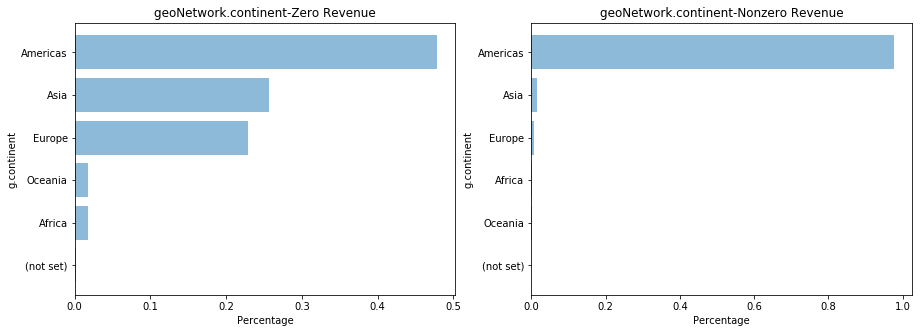

In [251]:
# It is not suprised to see that almost all the visitors who made transactions are Americas.
# Although many Asian and European people also visit the stores, they seldomly made purchase.

plot_diff_groups('g.continent')

#### geoNetwork.country

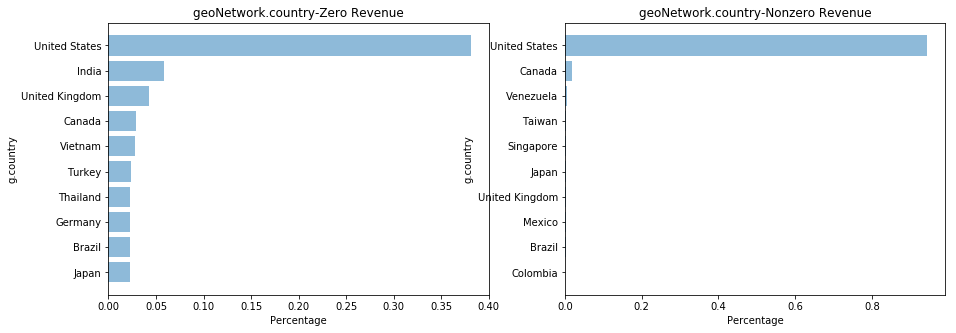

In [253]:
# Most of visitors who made purchase are from US which is consistent with the continent.

plot_diff_groups('g.country',10,10)

#### geNetwork.networkDomain

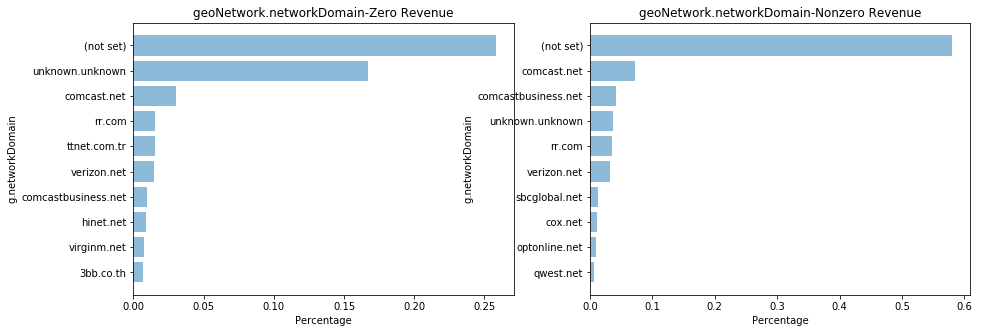

In [257]:
# Not much to tell from these two graphs.

plot_diff_groups('g.networkDomain',10,10)

#### geoNetwork.metro

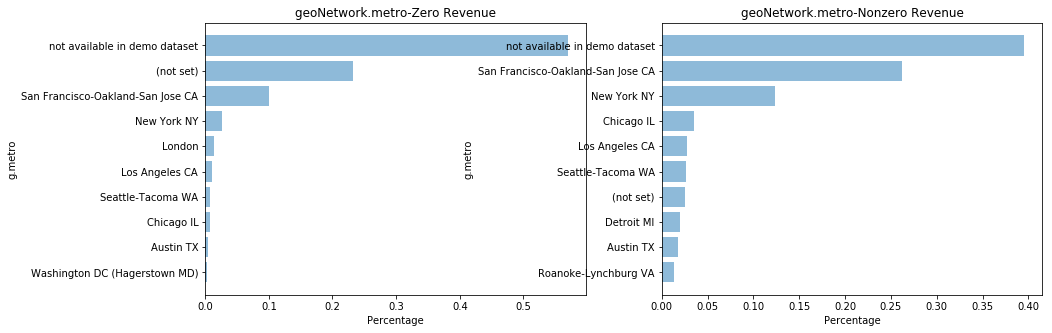

In [254]:
# The result is consistent with what we found in the city. Bay area and New York are the two major areas where visitors
# making purchases came from in the available dataset.

plot_diff_groups('g.metro',10,10)

#### geoNetwork.region

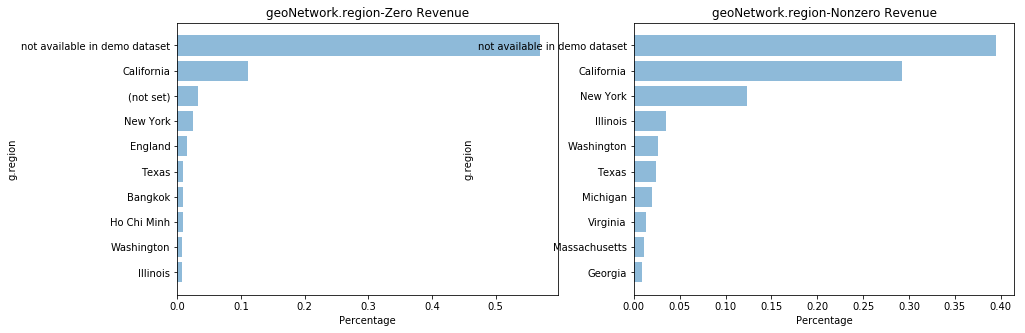

In [259]:
# Still, California and New York are the two major states where visitors making transactions came from
# (in the available dataset).

plot_diff_groups('g.region',10,10)

#### geoNetwork.subContinent

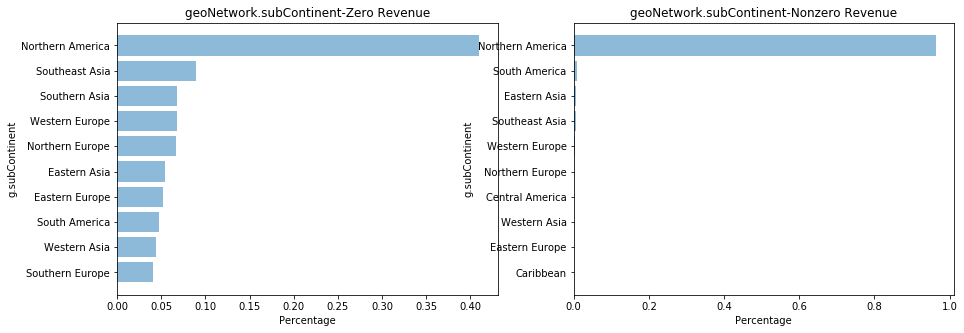

In [261]:
# Not much to tell.

plot_diff_groups('g.subContinent',10,10)

### Traffic

In [206]:
# Most of traffic's variables have either contant value or too many missing value (more than 90%).
traffic_cols = [col for col in train_df.columns if col.startswith('t.')and col not in cols_unique and col not in na_df.index]
traffic_cols

['t.campaign', 't.medium', 't.source']

#### traffic.campaign

In [218]:
# Both groups have a majority of "not set" (more than 90%)

campaign_zero = zero_df.groupby('t.campaign')['t.campaign'].count()/len(zero_df)
campaign_nonzero = nonzero_df.groupby('t.campaign')['t.campaign'].count()/len(nonzero_df)

#### traffic.medium

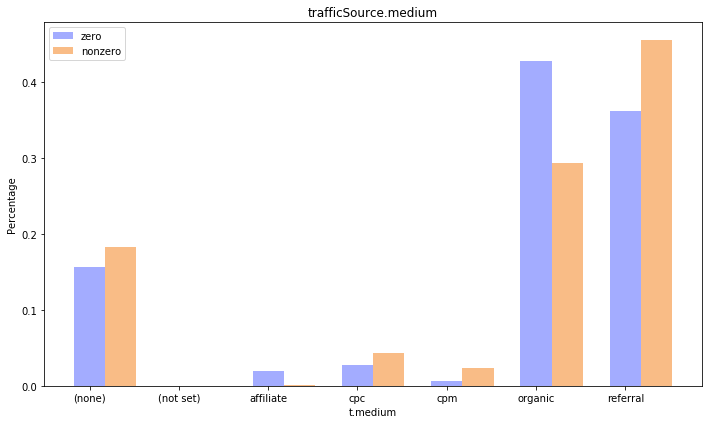

In [209]:
# Visitors with revenue tend to have traffic with referral??? How to interpret this.
# Visitors with revenue tend to have traffic with organic??? How to interpret this.

plot_two_groups('t.medium')

#### traffic.source

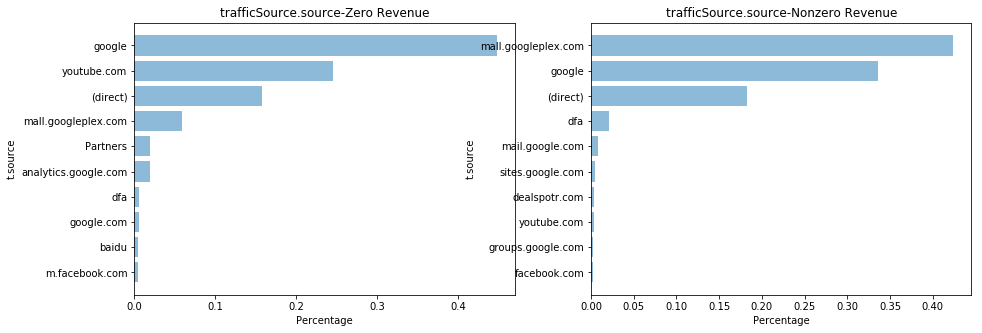

In [250]:
# There is a large difference in the traffic sources of two groups
# Top 3 sources for visitors with no revenue: google, youtube and direct
# Top 3 sources for visitors with revenue: mail.googleplex.com, google and direct
# It is interesting to see that nearly half of the visitors who made transaction got the source from mail.googleplex.com.
# Are these visitors are actually Google people themselves? 
plot_diff_groups('t.source',10,10)

### Totals

In [265]:
total_cols = [col for col in train_df.columns if col.startswith('totals.')and col not in cols_unique and col not in na_df.index]
total_cols

['totals.hits']